## *CLASSIFICATION*

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**LOADING DATASET**

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
df = data.frame

**PREPROCESSING**

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [8]:
df.shape

(569, 31)

In [9]:
df[df.duplicated()]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension'),
  Text(10, 0, 'radius error'),
  Text(11, 0, 'texture error'),
  Text(12, 0, 'perimeter error'),
  Text(13, 0, 'area error'),
  Text(14, 0, 'smoothness error'),
  Text(15, 0, 'compactness error'),
  Text(16, 0, 'concavity error'),
  Text(17, 0, 'concave points error'),
  Text(18, 0, 'symmetry error'),
  Text(19, 0, 'fractal dimension error'),
  Text(20, 0, 'worst radius'),
  Text(21, 0, 'worst texture'),
  Text(22, 0, 'worst perimeter'),
  Text(23, 0, 'worst area'),
  Text(24, 0, 'worst smooth

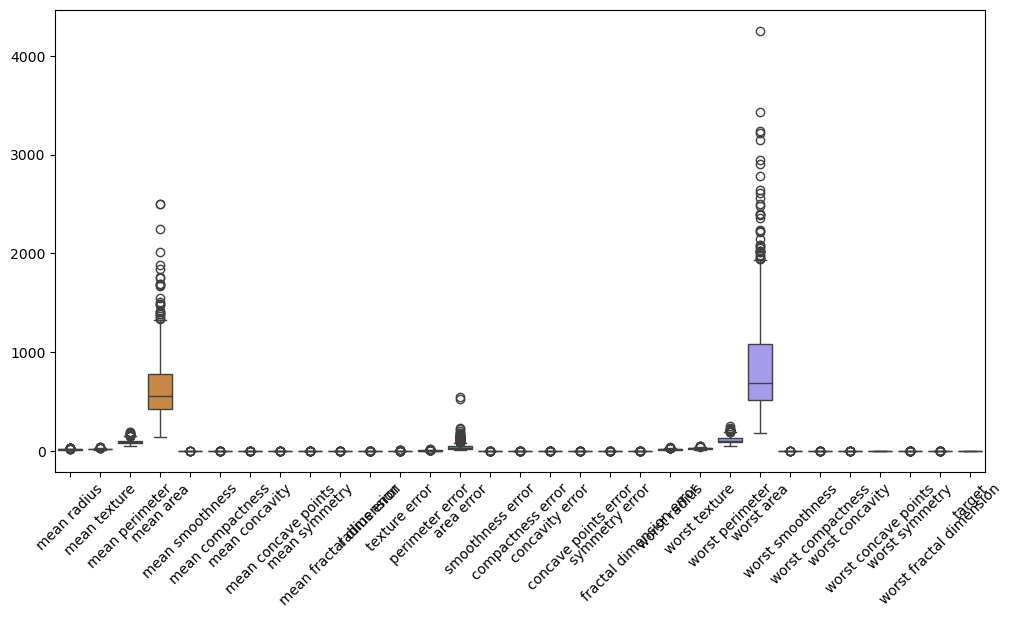

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(df)
plt.xticks(rotation=45)

<Axes: ylabel='worst perimeter'>

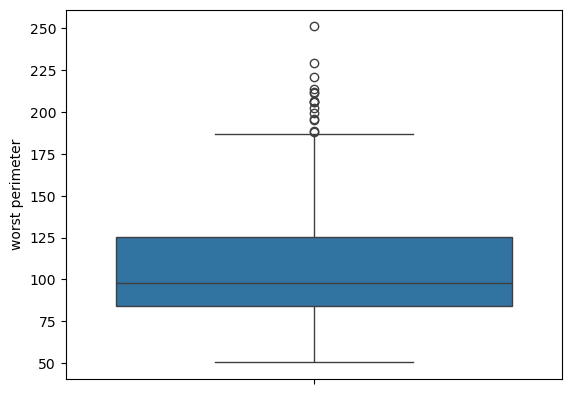

In [11]:
sns.boxplot(df['worst perimeter'])

<Axes: ylabel='mean perimeter'>

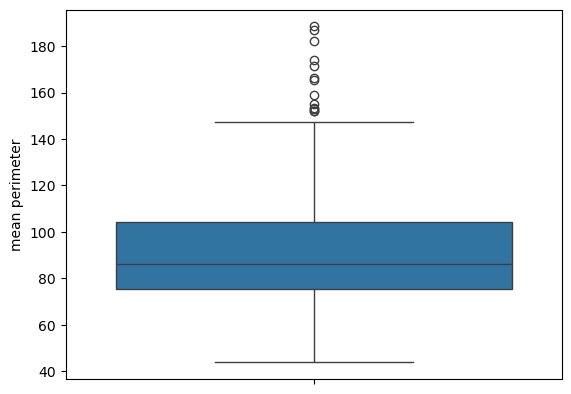

In [12]:
sns.boxplot(df['mean perimeter'])

<Axes: ylabel='perimeter error'>

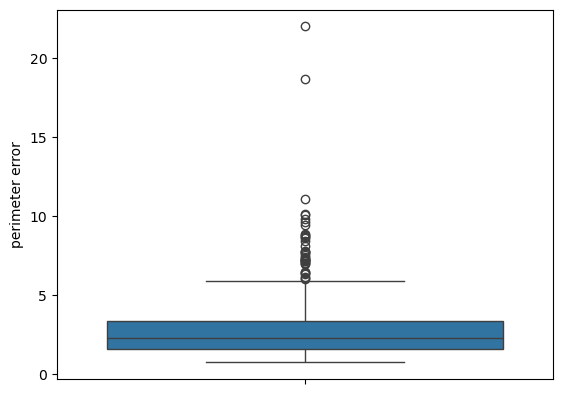

In [13]:
sns.boxplot(df['perimeter error'])

In [14]:
q1,q2,q3 = np.percentile(df['worst perimeter'],[25,50,75])
print(q1,q2,q3) 
IQR = q3-q1
print(IQR)
lower = q1-1.5*IQR
higher = q3+1.5*IQR
print(lower,higher)

outlier=[]
for i in df['worst perimeter']:
    if i<lower or i>higher:
        outlier.append
print(outlier)

84.11 97.66 125.4
41.290000000000006
22.17499999999999 187.335
[]


In [15]:
np.where(df['worst perimeter']>higher)

(array([ 23,  82, 108, 180, 212, 236, 265, 272, 339, 352, 368, 369, 461,
        503, 521]),)

In [16]:
np.where(df['worst perimeter']>higher,higher,df['worst perimeter'])

array([184.6  , 158.8  , 152.5  ,  98.87 , 152.2  , 103.4  , 153.2  ,
       110.6  , 106.2  ,  97.65 , 123.8  , 136.5  , 151.7  , 112.   ,
       108.8  , 124.1  , 123.4  , 136.8  , 186.8  ,  99.7  ,  96.09 ,
        65.13 , 125.1  , 187.335, 177.   , 152.4  , 122.4  , 139.9  ,
       149.3  , 134.9  , 160.5  , 119.4  , 136.1  , 161.4  , 132.7  ,
       133.5  , 116.2  ,  84.46 ,  95.54 , 107.3  , 102.5  ,  87.22 ,
       177.4  , 113.1  , 105.5  , 150.6  ,  57.26 , 102.8  ,  89.88 ,
        99.   ,  82.98 ,  96.08 ,  83.67 , 135.1  , 117.7  ,  81.81 ,
       170.1  , 115.7  ,  90.24 ,  59.9  ,  69.86 ,  62.06 , 119.1  ,
        65.59 , 111.8  , 114.6  ,  67.03 ,  78.   ,  65.5  ,  85.67 ,
       165.9  ,  62.56 , 151.6  , 110.3  ,  89.71 , 128.8  ,  91.36 ,
       150.1  , 170.3  ,  91.88 ,  84.53 ,  96.66 , 187.335, 141.3  ,
        87.78 , 152.2  , 108.4  , 152.9  ,  91.46 , 109.4  , 102.9  ,
       107.5  , 104.5  ,  97.59 , 123.5  , 156.1  ,  82.14 ,  68.81 ,
        82.96 , 109.

In [17]:
df['worst perimeter']=np.where(df['worst perimeter']>higher,higher,df['worst perimeter'])

<Axes: ylabel='worst perimeter'>

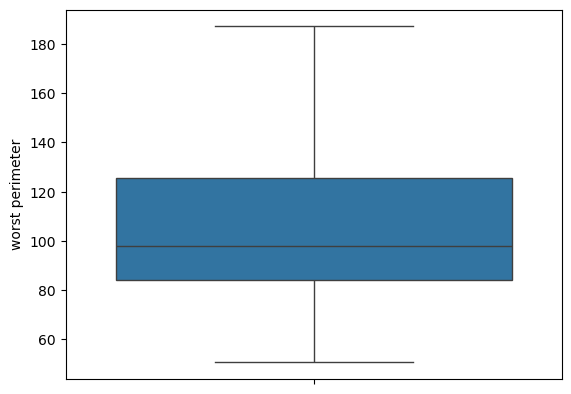

In [18]:
sns.boxplot(df['worst perimeter'])

In [19]:
q1,q2,q3 = np.percentile(df['mean perimeter'],[25,50,75])
print(q1,q2,q3) 
IQR = q3-q1
print(IQR)
lower = q1-1.5*IQR
higher = q3+1.5*IQR
print(lower,higher)

outlier=[]
for i in df['mean perimeter']:
    if i<lower or i>higher:
        outlier.append
print(outlier)

75.17 86.24 104.1
28.929999999999993
31.775000000000013 147.49499999999998
[]


In [20]:
np.where(df['mean perimeter']>higher)

(array([ 82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 461, 503, 521]),)

In [21]:
np.where(df['mean perimeter']>higher,higher,df['mean perimeter'])

array([122.8  , 132.9  , 130.   ,  77.58 , 135.1  ,  82.57 , 119.6  ,
        90.2  ,  87.5  ,  83.97 , 102.7  , 103.6  , 132.4  , 103.7  ,
        93.6  ,  96.73 ,  94.74 , 108.1  , 130.   ,  87.46 ,  85.63 ,
        60.34 , 102.5  , 137.2  , 110.   , 116.   ,  97.41 , 122.1  ,
       102.4  , 115.   , 124.8  ,  77.93 , 112.8  , 127.9  , 107.   ,
       110.1  ,  93.63 ,  82.61 ,  95.54 ,  88.4  ,  86.18 ,  71.9  ,
       128.3  ,  87.32 ,  85.42 , 123.7  ,  51.71 ,  85.98 ,  78.04 ,
        86.91 ,  74.72 ,  87.21 ,  75.71 , 120.3  ,  97.26 ,  73.34 ,
       125.5  ,  95.55 ,  82.61 ,  54.34 ,  64.55 ,  54.66 ,  96.42 ,
        59.2  ,  82.69 ,  97.4  ,  60.11 ,  71.8  ,  58.79 ,  81.37 ,
       123.6  ,  58.79 , 114.2  ,  90.43 ,  79.19 , 104.1  ,  87.91 ,
       120.2  , 143.7  ,  83.19 ,  73.81 ,  86.49 , 147.495, 129.1  ,
        76.95 , 121.1  ,  94.25 , 122.   ,  79.78 ,  95.77 ,  94.57 ,
       100.2  ,  84.74 ,  86.6  , 100.3  , 132.4  ,  77.79 ,  62.11 ,
        74.34 ,  94.

In [22]:
df['mean perimeter']=np.where(df['mean perimeter']>higher,higher,df['mean perimeter'])

<Axes: ylabel='mean perimeter'>

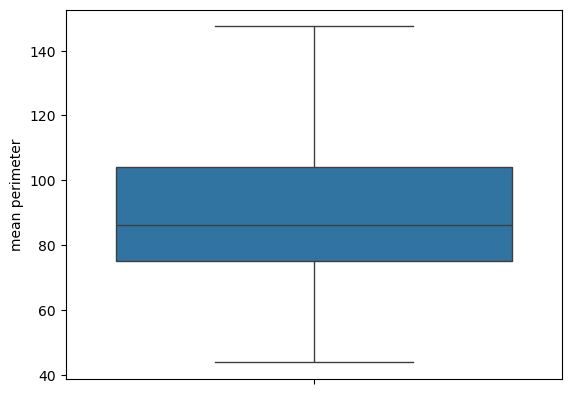

In [23]:
sns.boxplot(df['mean perimeter'])

In [24]:
q1,q2,q3 = np.percentile(df['perimeter error'],[25,50,75])
print(q1,q2,q3) 
IQR = q3-q1
print(IQR)
lower = q1-1.5*IQR
higher = q3+1.5*IQR
print(lower,higher)

outlier=[]
for i in df['perimeter error']:
    if i<lower or i>higher:
        outlier.append
print(outlier)

1.606 2.287 3.357
1.7510000000000001
-1.0205 5.9835
[]


In [25]:
np.where(df['perimeter error']>higher)

(array([  0,  12,  25,  38,  42,  77,  78,  82, 108, 122, 138, 161, 168,
        210, 212, 218, 236, 250, 256, 258, 262, 265, 272, 300, 302, 335,
        339, 352, 366, 368, 369, 417, 460, 461, 503, 521, 563, 564]),)

In [26]:
np.where(df['perimeter error']>higher,higher,df['perimeter error'])

array([5.9835, 3.398 , 4.585 , 3.445 , 5.438 , 2.217 , 3.18  , 3.856 ,
       2.406 , 2.039 , 2.466 , 3.564 , 5.9835, 2.903 , 2.061 , 2.879 ,
       3.195 , 3.854 , 5.865 , 2.058 , 1.383 , 1.909 , 3.384 , 4.303 ,
       5.455 , 5.9835, 2.11  , 5.632 , 3.498 , 4.655 , 5.574 , 3.475 ,
       3.999 , 3.528 , 2.183 , 3.008 , 2.657 , 1.17  , 5.9835, 1.545 ,
       1.572 , 1.822 , 5.9835, 2.427 , 1.334 , 4.293 , 1.094 , 1.897 ,
       1.848 , 1.735 , 2.635 , 1.449 , 1.52  , 4.877 , 2.097 , 2.183 ,
       4.837 , 2.735 , 2.595 , 1.046 , 3.312 , 2.493 , 5.373 , 2.608 ,
       2.927 , 2.45  , 1.66  , 1.831 , 1.885 , 1.471 , 5.486 , 3.168 ,
       3.705 , 1.957 , 1.74  , 5.029 , 2.652 , 5.9835, 5.9835, 1.778 ,
       2.077 , 1.535 , 5.9835, 5.801 , 1.441 , 4.782 , 3.301 , 3.055 ,
       2.203 , 3.814 , 2.279 , 2.075 , 2.701 , 2.099 , 3.706 , 4.554 ,
       2.41  , 2.132 , 1.475 , 2.376 , 2.861 , 1.553 , 1.183 , 1.528 ,
       2.302 , 2.41  , 2.155 , 0.8484, 5.9835, 1.597 , 2.747 , 2.711 ,
      

In [27]:
df['perimeter error']=np.where(df['perimeter error']>higher,higher,df['perimeter error'])

<Axes: ylabel='perimeter error'>

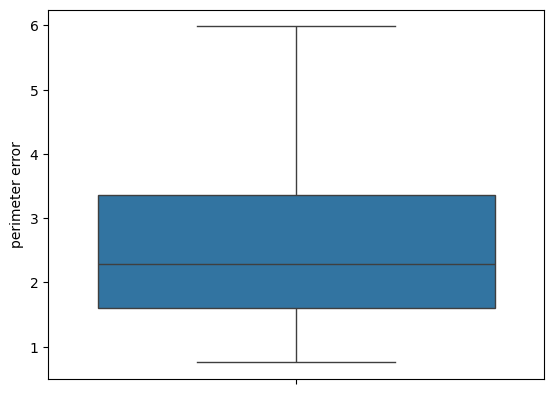

In [28]:
sns.boxplot(df['perimeter error'])

<Axes: >

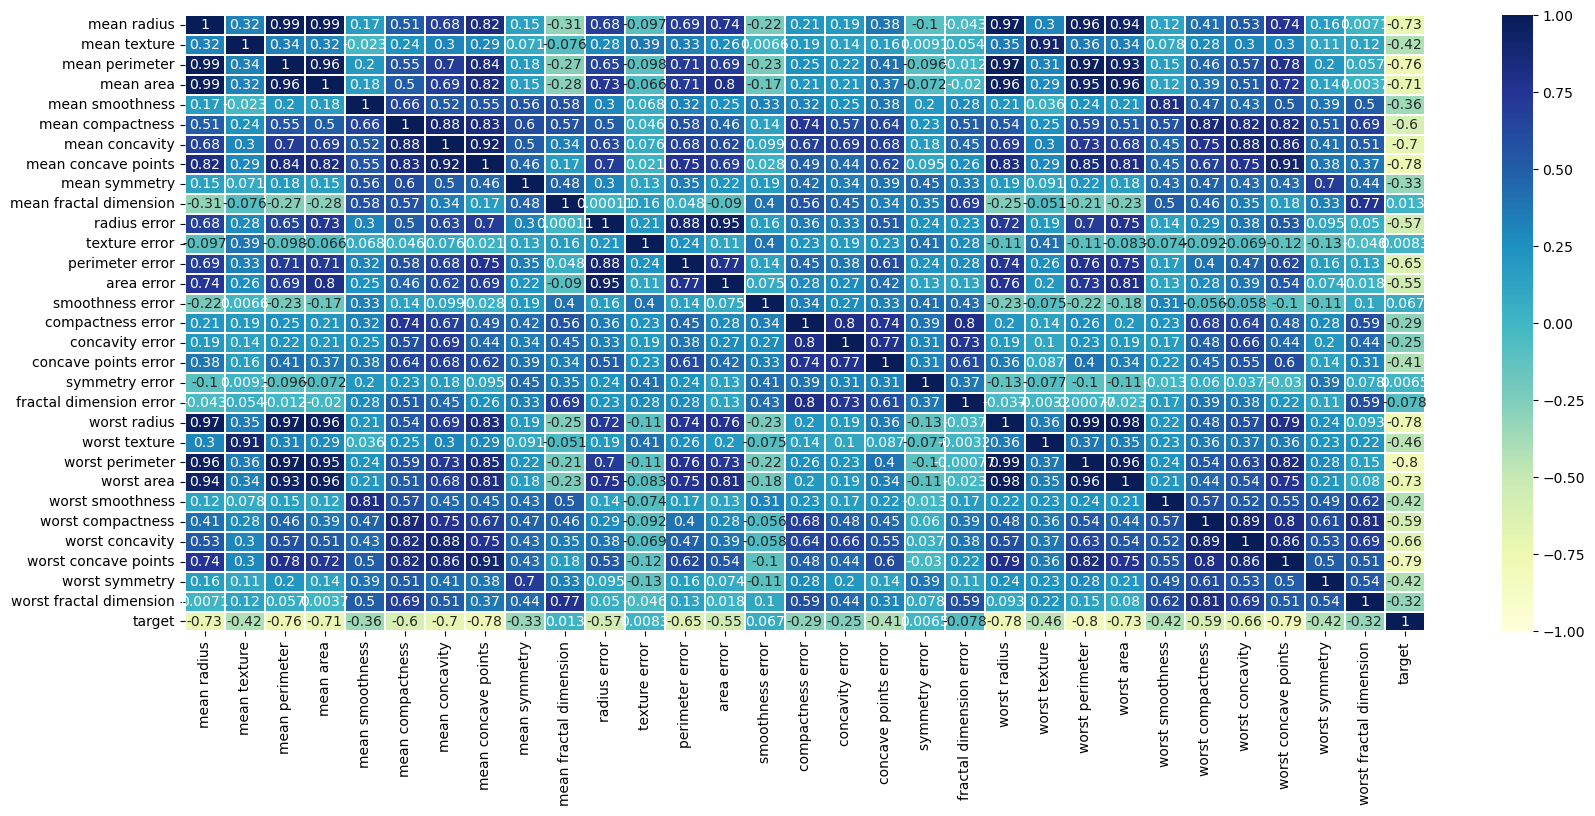

In [29]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

In [30]:
x = df.drop('target', axis=1)
y = df['target']

In [31]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn import preprocessing
standadisation=StandardScaler()
x=standadisation.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-3.996022e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,4.245774e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-2.073821e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.763105e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-7.110704e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-7.076603e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.303295e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.832903e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,5.452832e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.854938e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,2.429814e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,2.525225e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


**Explain the preprocessing steps you performed and justify why they are necessary for this dataset.**

1.Loaded the dataset.

2.Checked for missing values, it has no missing values.

3.Checked for outliers, then handled with IQR and capping method, otherwise this may create distance and effect models like KNN and SVM.

4.Split the dataset into features (X) and target (y). Supervised learning requires separating the input variables and the output labels.

5.Feature Scaling using StandardScaler,dataset contains features on very different scales so StandardScaler normalizes it.

## 1. Logistic Regression

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.33)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
log_model = LogisticRegression()

In [69]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [70]:
y_pred = log_model.predict(x_test)

In [71]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [72]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [73]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9787234042553191

**Provide a brief description of how it works and why it might besuitable for this dataset.**

In logistic regression, transforms outputs into values between 0 and 1.It applies a sigmoid function to a linear combination of input features.Then classifies samples by comparing this probability against a threshold.Features are continuous, dataset has clear linear separability in some features, so it’s Suitable for the Breast Cancer Dataset.

### 2.Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtr = DecisionTreeClassifier()
dtr.fit(x_train, y_train)

DecisionTreeClassifier()

In [76]:
y_pred = dtr.predict(x_test)

In [77]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1])

In [78]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9148936170212766

A Decision Tree splits the dataset into smaller groups by choosing features and thresholds that best separate the classes. Create branches based on feature conditions.Repeat this splitting until it reaching the stopping rule.The dataset contains clear patterns and strong feature relationships,which trees can capture easily. Decision Trees handle non-linear relationships well.

## 3. Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rfr = RandomForestClassifier(n_estimators=100, random_state=42)
rfr.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [81]:
y_pred=rfr.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [82]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9574468085106383

Random Forest builds multiple decision trees on different bootstrapped samples of the data and averages their predictions for final output.It can handles non-linear feature interactions extremely well.Works reliably on noisy or high-dimensional data. It can resist overfitting than the decision tree.So, perform well on the breast cancer dataset.

## 4. Support Vector Machine (SVM)

In [83]:
from sklearn.svm import SVC

In [84]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [85]:
y_pred=svc.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [86]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9680851063829787

SVM is a margin-maximizing classifier. It find the best separating hyperplane that maximizes the classes.dataset is high-dimensional, SVM handles this well.SVM is robust against overfitting when regularization is set correctly. Works well even when features are correlated. SVM is a strong baseline model for this type of classification tasks because it cares about maximizing separation, not just fitting data.

## 5. k-Nearest Neighbors (k-NN)

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [98]:
y_pred = knn.predict(x_test)

In [99]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [100]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9574468085106383

k-NN is a distance-based classifier, It makes predictions by looking at the k closest data points (neighbors) in the training set and choosing the most common class.The dataset is not huge, k-NN works fine. Classes are fairly well-separated, distance-based methods perform well.Good as a baseline non-parametric model.

**Model Comparison**

● Compare the performance of the five classification algorithms.

● Which algorithm performed the best and which one performed the worst?

## Model Accuracy
Logistic Regression : 0.9787234042553191

SVM (SVC)	: 0.9680851063829787

Random Forest:  0.9574468085106383

k-NN	: 0.9574468085106383

Decision Tree : 0.9148936170212766

Hence, the Best Performer is Logistic Regression (0.9787) and the Worst Performer id Decision Tree (0.9149). 
**Best-Performing Algorithm:**  Logistic Regression,The  Logistic Regression achieved  highest accuracy score (0.9787) among all models.This means Logistic Regression handles that extremely well.It avoids overfitting compared to tree-based methods.
**Worst-Performing Algorithm:** Decision Tree, The Decision Tree model gave the lowest accuracy score (0.9149). Decision trees overfit easily and has High variance. The support vector machine is the second best performing algorithm with accuracy score of 0.9680851063829787. Random forest 